In [8]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar
import math

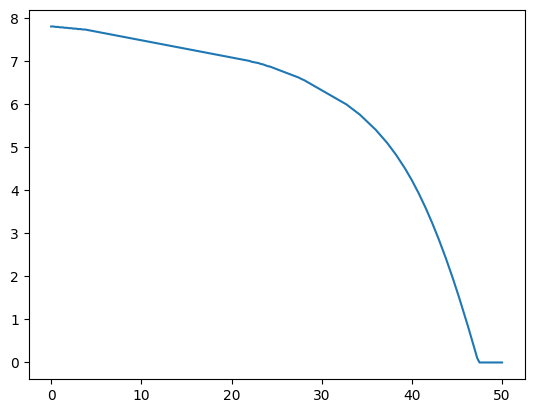

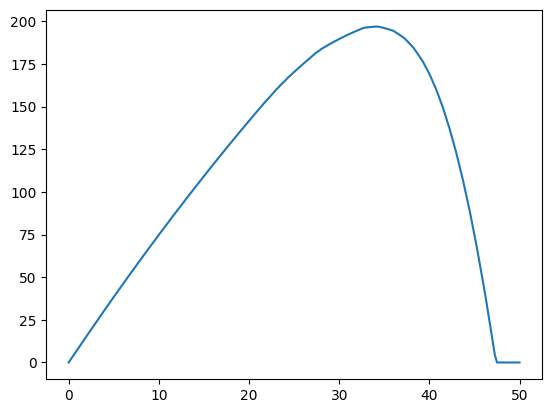

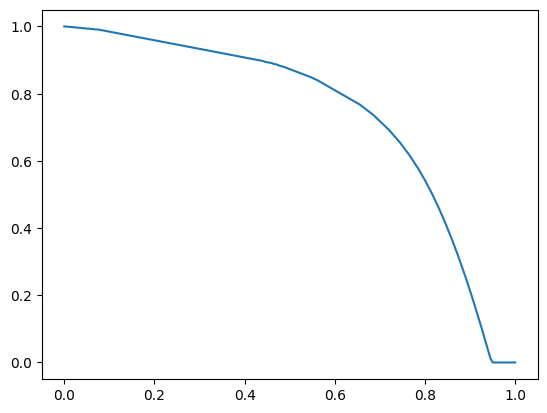

In [16]:
# Voltage array (V) - 200 elements
V = [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 
     5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 
     10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 
     14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 
     18.5, 18.75, 19.0, 19.25, 19.5, 19.75, 20.0, 20.25, 20.5, 20.75, 21.0, 21.25, 21.5, 21.75, 22.0, 22.25, 22.5, 
     22.75, 23.0, 23.25, 23.5, 23.75, 24.0, 24.25, 24.5, 24.75, 25.0, 25.25, 25.5, 25.75, 26.0, 26.25, 26.5, 26.75, 
     27.0, 27.25, 27.5, 27.75, 28.0, 28.25, 28.5, 28.75, 29.0, 29.25, 29.5, 29.75, 30.0, 30.25, 30.5, 30.75, 31.0, 
     31.25, 31.5, 31.75, 32.0, 32.25, 32.5, 32.75, 33.0, 33.25, 33.5, 33.75, 34.0, 34.25, 34.5, 34.75, 35.0, 35.25, 
     35.5, 35.75, 36.0, 36.25, 36.5, 36.75, 37.0, 37.25, 37.5, 37.75, 38.0, 38.25, 38.5, 38.75, 39.0, 39.25, 39.5, 
     39.75, 40.0, 40.25, 40.5, 40.75, 41.0, 41.25, 41.5, 41.75, 42.0, 42.25, 42.5, 42.75, 43.0, 43.25, 43.5, 43.75, 
     44.0, 44.25, 44.5, 44.75, 45.0, 45.25, 45.5, 45.75, 46.0, 46.25, 46.5, 46.75, 47.0, 47.25, 47.5, 47.75, 48.0, 
     48.25, 48.5, 48.75, 49.0, 49.25, 49.5, 49.75, 50.0]

# Practical Current array (I) - 200 elements (for corresponding V array)
I = [7.8, 7.8, 7.79, 7.79, 7.78, 7.78, 7.77, 7.77, 7.76, 7.76, 7.75, 7.75, 7.74, 7.74, 7.73, 7.73, 7.72, 7.71, 7.70, 7.69,
     7.68, 7.67, 7.66, 7.65, 7.64, 7.63, 7.62, 7.61, 7.60, 7.59, 7.58, 7.57, 7.56, 7.55, 7.54, 7.53, 7.52, 7.51, 7.50, 7.49,
     7.48, 7.47, 7.46, 7.45, 7.44, 7.43, 7.42, 7.41, 7.40, 7.39, 7.38, 7.37, 7.36, 7.35, 7.34, 7.33, 7.32, 7.31, 7.30, 7.29,
     7.28, 7.27, 7.26, 7.25, 7.24, 7.23, 7.22, 7.21, 7.20, 7.19, 7.18, 7.17, 7.16, 7.15, 7.14, 7.13, 7.12, 7.11, 7.10, 7.09,
     7.08, 7.07, 7.06, 7.05, 7.04, 7.03, 7.02, 7.01, 7.00, 6.98, 6.97, 6.96, 6.95, 6.93, 6.92, 6.90, 6.88, 6.87, 6.85, 6.83,
     6.81, 6.79, 6.77, 6.75, 6.73, 6.71, 6.69, 6.67, 6.65, 6.63, 6.61, 6.58, 6.56, 6.53, 6.50, 6.47, 6.44, 6.41, 6.38, 6.35,
     6.32, 6.29, 6.26, 6.23, 6.20, 6.17, 6.14, 6.11, 6.08, 6.05, 6.02, 5.99, 5.95, 5.91, 5.87, 5.83, 5.79, 5.75, 5.70, 5.65,
     5.60, 5.55, 5.50, 5.45, 5.40, 5.34, 5.28, 5.22, 5.16, 5.10, 5.03, 4.96, 4.89, 4.82, 4.74, 4.66, 4.58, 4.50, 4.41, 4.32,
     4.23, 4.13, 4.03, 3.93, 3.82, 3.71, 3.60, 3.48, 3.36, 3.24, 3.11, 2.98, 2.85, 2.71, 2.57, 2.43, 2.28, 2.13, 1.98, 1.82,
     1.66, 1.50, 1.33, 1.16, 0.99, 0.82, 0.64, 0.46, 0.28, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,0.00]

V = np.array(V)
I = np.array(I)


Voc = max(V)
Isc = max(I)

v = np.array(V)/Voc
i = np.array(I)/Isc

Area = np.power(16.6,2)

plt.figure(1)
plt.plot(V,I)

plt.figure(2)
plt.plot(V,V*I)

plt.figure(3)
plt.plot(v,i)

In [10]:
def find_closest_indices(array, target):
    # Sort the array to ensure it is in order, and store the original indices
    sorted_array_with_indices = sorted(enumerate(array), key=lambda x: x[1])
    sorted_indices = [index for index, value in sorted_array_with_indices]
    sorted_array = [value for index, value in sorted_array_with_indices]

    # Initialize variables for lower and upper bounds
    lower_index = None
    upper_index = None

    # Find the closest lower and upper values
    for index, value in sorted_array_with_indices:
        if value < target:
            lower_index = index  # Update lower index
        elif value > target and upper_index is None:
            upper_index = index  # Update upper index
            break

    # Return the indices of the closest lower and upper values
    return lower_index, upper_index

def a_of_b(a_arr,b_arr,value):
    closest_indeices = find_closest_indices(b_arr,value)
    return (a_arr[closest_indeices[0]] + a_arr[closest_indeices[1]])/2

Voltage at maximum power: 0.684045454274577
Maximum power: 0.5049921931441718


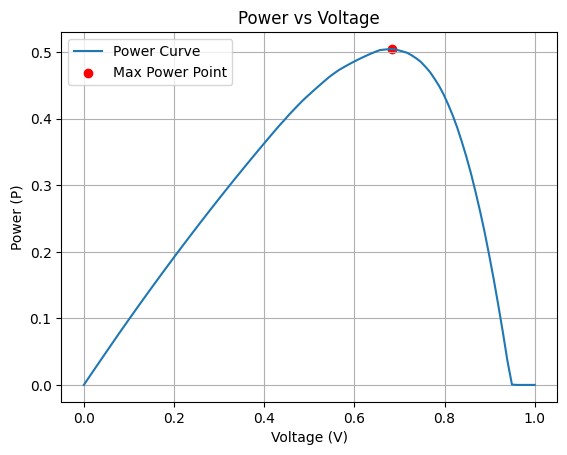

Vp =  34.202272713728846 , Ip =  5.7700000000000005  & Pp =  197.34711355821545


In [11]:
# Step 1: Fit a cubic spline to I as a function of V
i_spline = CubicSpline(v, i)

# Step 2: Define power as a function of V
def power(v):
    return v * i_spline(v)

# Step 3: Find the maximum of P(V) using minimize_scalar (minimize -P(V))
result = minimize_scalar(lambda v: -power(v), bounds=(v.min(), v.max()), method='bounded')

# Step 4: Extract the voltage at maximum power and the maximum power value
vp = result.x
pp = power(vp)

# Output the results
print(f"Voltage at maximum power: {vp}")
print(f"Maximum power: {pp}")

# Optional: Plot the power curve
v_vals = np.linspace(v.min(), v.max(), 100)  # Generate smooth V values for plotting
p_vals = power(v_vals)

plt.plot(v_vals, p_vals, label="Power Curve")
plt.scatter([vp], [pp], color="red", label="Max Power Point")
plt.xlabel("Voltage (V)")
plt.ylabel("Power (P)")
plt.title("Power vs Voltage")
plt.legend()
plt.grid(True)
plt.show()

ip = a_of_b(i,v,vp)

Vp = vp*Voc
Ip = ip*Isc

Pp = Vp*Ip

print('Vp = ',Vp,', Ip = ',Ip,' & Pp = ',Pp)

In [12]:
FF = vp*ip
print('Fill Factor = ',FF)

gamma = (a_of_b(i,v,0.6) - 0.4)/0.6

m = (math.log10(0.4 - (((1-gamma)*a_of_b(v,i,0.6))/gamma))) / math.log10(a_of_b(v,i,0.6))

print('gamma = ',gamma,' & m = ',m)

Fill Factor =  0.5060182398928602
gamma =  0.6837606837606838  & m =  12.215548572934773


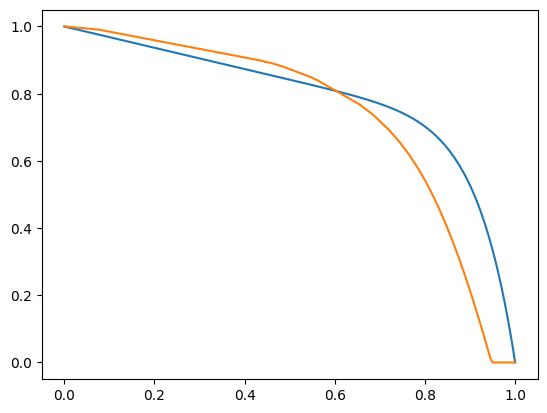

In [13]:
v_check = v

# We know the equation...
i_check = 1 - (1-gamma)*v -gamma*v**m

plt.plot(v_check,i_check)
plt.plot(v,i)
